## Projet 2: Estimation par projection


<p> L'objectif de ce TP est d'étudier de façon numérique l'estimateur par projection que nous avons introduit en cours, ainsi que l'influence du paramètre de troncature N sur cet estimateur. Ensuite nous appliquerons la méthodologie utilisée dans l'exercice 1 sur notre jeu de données qui représente la démographie en France selon les années depuis 100 ans.  </p>

__Exercice 1:Fourier__
<P> Dans un premier temps nous allons simuler n=100 couples de variables aléatoires $(X_i,Y_i), i=1,...,n$ tel que les $X_i$ sont identiquement et indépendamment distribués sur [0,1] $X_i$ : $\sim N(0,1)$. Les $Y_i$ sont définis comme étant le résultat d'une fonction de régression $f$ appliqué aux $X_i$ auquel nous ajoutons un bruit $\sigma \xi_i$.avec les $\xi_i$ des variables aléatoires normales i.i.d et $f$ une fonction de $[0,1]$&rarr;$\mathbb{R}$ définie par $$ f(x)=(x^2 2^{x-1}-(x-0,5)^3)  sin(10x)$$  avec $\sigma=0,2$,  et $$  Y_i=f(X_i)+\sigma \xi_i $$ </p>


In [47]:
from random import uniform
import numpy as np

# 1
    # a
n= 100

X = [uniform(0, 1) for i in range(n)]

    # b
def f (x) :
    return ((x ** 2) * (2 ** (x - 1)) - ((x - 0.5) ** 3)) * np.sin (10 * x)

ksi = np.random.normal(0,1,n)

sigma = 0.2

Y = [f (x) + (sigma * ksi) for x in X]

for i in range(n) :
    Y [i] = f (X [i]) + (sigma * ksi [i])

<p>
    Ensuite nous représentons les points obtenus sous forme d'un nuage de point. Nous traçons aussi la fonction de régression $f$ sur le même graphique.
</p>

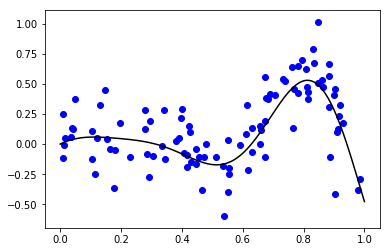

In [48]:
# 2
import matplotlib.pyplot as plt

plt.scatter (X, Y, color = "blue")

x_f = np.linspace(start=0, stop=1, num=200, endpoint="True")
y_f = np.linspace(start=0, stop=len(x_f), num=len(x_f))

i = 0
while i < len(x_f):
    y_f[i] = f (x_f [i])
    i += 1

plt.plot (x_f, y_f, color = "black")
plt.show()

<p>
    Sur ce graphique, nous pouvons observer que le nuage de points obtenus (en bleu) suit bien approximativement la fonction de régression $f$ (en noir) auquel un bruit est appliqué. Nous observons bien un replat (entre 0 et 0,4) suivit d'un grand pic (entre 0,6 et 1)  qui atteint son maximum à 0,6 environ pour $x \approx 0,8$ séparés par un petit creux (entre 0,4 et 0,6) qui correspond à un minimum local atteint à environs -0,2 pour $x \approx 0,5$.
</p>

<p>
    Dans cette partie nous allons estimer la fonction de régression $f$, pour cela nous construirons un estimateur par projection défini sur la base de Fourier.<br>
    Tout d'abord nous traçerons les cinq premières fonctions de Fourier selon les formules suivantes:
    </br>
    $$
        (\phi_j)_{j\geq1}:
        \left\{
            \begin{array}{l}
              \phi_1 (x) = 1\\
              \phi_{2j} (x) = \sqrt {2} cos (2 \pi j x)\\
              \phi_{2j + 1} (x) = \sqrt {2} sin (2 \pi j x)
            \end{array}
        \right.
    $$
    Nous rappelons que $(\phi_j)$ est une base trigonométrique orthonormale de $\mathbb{L}^2 [0, 1]$
    <BR>
    $<\phi_j, \phi_k> = \delta_{j, k}$ avec $1 \leq j, k \leq n - 1$
</p>

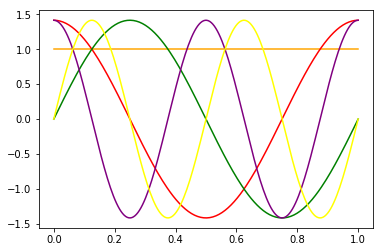

In [28]:
# 3
    # a
import math
def fourier (x, i) :
    if i == 1 :
        return 1
    elif i % 2 == 0 :
        return math.sqrt (2) * np.cos (2 * np.pi * (i / 2) * x)
    else :
        return math.sqrt (2) * np.sin (2 * np.pi * ((i - 1) / 2) * x)

col = ["orange", "red", "green", "purple", "yellow", "brown", "olive"]
l = 1
while l <= 5 :
    x_four = np.linspace(start=0, stop=1, num=200, endpoint="True")
    y_four = np.linspace(start=0, stop=len(x_four), num=len(x_four))

    k = 0
    while k < len(x_four):
        y_four [k] = fourier (x_four[k], l)
        k += 1
    
    plt.plot (x_four, y_four, color = col [l - 1])
    
    l += 1
    
plt.show ()

<P>
    Les séries de Fourier ont été introduites par Joseph Fourier en 1822, il s'agit d'un signal sinusoïdale périodique.
    <BR>
    <UL>
        <LI>
            La courbe orange correspond à la première fonction de fourier. On la reconnait car c'est une constante à 1.
        </LI>
        <LI>
            La courbe rouge est celle de la seconde fonction de fourier. Elle est centrée et de période 1. On peut observer 2 changements de direction sur l'intervalle $[0, 1]$
        </LI>
        <LI>
            La courbe verte est celle de la troisième fonction de fourier. Elle est de période $1$. On peut observer 3 changements de direction sur l'intervalle $[0, 1]$
        </LI>
        <LI>
            La courbe viollette est celle de la quatrième fonction de fourier. Elle est centrée et de période $\frac {1}{2}$. On peut observer 4 changements de direction sur l'intervalle $[0, 1]$
        </LI>
        <LI>
            La courbe jaune est celle de la cinquième fonction de fourier. Elle est de période $\frac {1}{2}$. On peut observer 5 changements de direction sur l'intervalle $[0, 1]$
        </LI>
    </UL>
    Nous observons des déphasages entre les $\phi_{2j}$ et les $\phi_{2j + 1}$ dues au changement de phase pour chaque fonction cosinus ou sinus. Nous observons également que ces fonctions sont de périodes $\frac {1}{j}$ pour les $\phi_{2j}$ et les $\phi_{2j + 1}$. Nous en concluons que pour les fonction $\phi_j$ on observe $j$ changements de directions.
</P>

<p>
    Une fois que nous avons traçé sur le même graphique les cinq premières fonctions de la base de Fourier, nous passons à la construction de l'estimateur par projection de $f$ pour $N$ $\in (5,10,15,20,30,50,70)$<br>
    N est le paramètre de troncature, il joue le même rôle que la fenêtre pour les estimateurs à moyen, notre estimateur est défini comme ceci : $$ \widehat{f}_{N}(x)= \sum\limits_{\substack{i=0}}^{n}{\widehat{\theta}_j} \phi_j          \qquad où \quad \widehat{\theta}_j=\frac{1}{n} \sum\limits_{\substack{i=1}}^{n} Y_i  \phi_j[X_i]$$
</p>

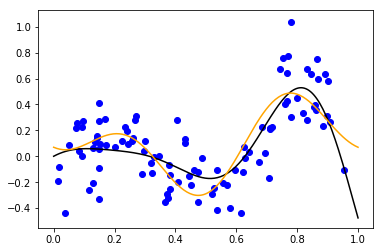

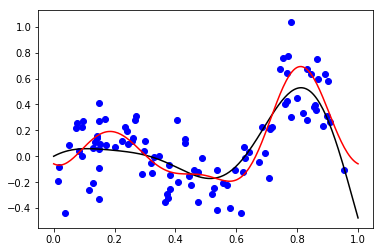

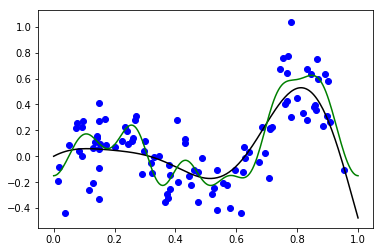

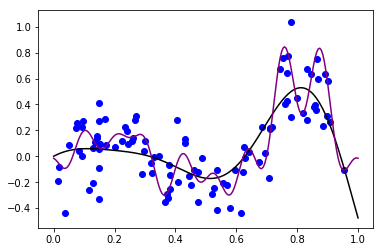

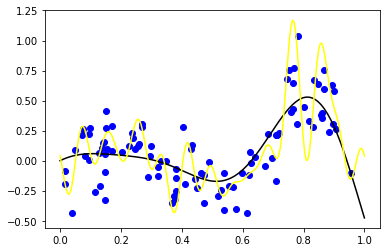

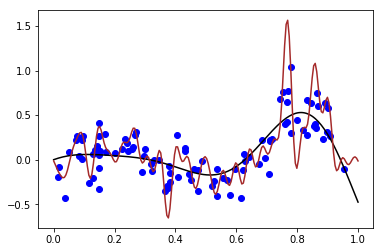

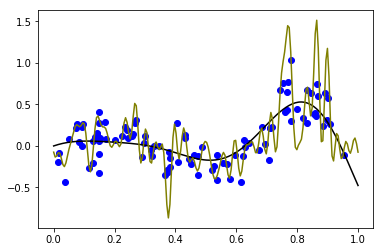

In [29]:
N = [5, 10, 15, 20, 30, 50, 70]

def theta_j_chap (X, Y, j) :
    n = len (X)
    somme = 0
    for i in range (1, n) :
        somme += Y [i] * fourier (X [i], j)
    return somme / n

def f_projete (x, N, X, Y) :
    f = 0
    for j in range (1, N) :
        f += theta_j_chap (X, Y, j) * fourier (x, j)
    return f

couleur = 0
for N_parti in N :
    x_est_proj = np.linspace(start=0, stop=1, num=200, endpoint="True")
    y_est_proj = np.linspace(start=0, stop=len(x_est_proj), num=len(x_est_proj))

    k = 0
    while k < len(x_est_proj):
        y_est_proj [k] = f_projete (x_est_proj [k], N_parti, X, Y)
        k += 1
    #print (col [couleur])
    plt.figure()
    plt.scatter (X, Y, color = "blue")
    plt.plot (x_f, y_f, color = "black")
    plt.plot (x_est_proj, y_est_proj, color = col [couleur])
    #legende = mpatches.Patch(color=col [couleur], label=N_parti)
    #plt.legend(handles=[legende])
    couleur += 1
    
plt.show ()
## Plus la courbe est achuré, plus le N est grand


<P>
    Nous remarquons que plus la valeure de N est grande plus la courbe est achurée. Et que le nombre de changement de directions de nos courbes d'estimateurs tracés sur $[0, 1]$ corresponds aux changements de directions des courbes de la base de Fourier utilisée dans la question précedente.
    <BR>
    Sur ces graphiques la courbe noire représente la fonction de régression que l'on veut estimer. Le nuage de points des couples $(X_i,Y_i)$ est représenté en bleu tandis que les estimateurs de la fonction de régression dépendants de différents $N$ sont tracés en différentes couleures . Etant donné que l'estimateur dépend de la base de Fourier, l'allure de la courbe de notre estimateur dépendra de l'aspect de la courbe de la base de fourier utilisée.
</P>
<P>
    Ainsi pour chacun des graphes, nous pouvons observer :
    <UL>
        <LI>
            La courbe orange est tracée avec une valeure de $N = 5$, en effet,la courbe corresponds à la base de fourier tracée pour $\phi_5(x)$ nous remarquons ainsi que les extemums sont atteints aux mêmes valeurs de x que la base de fourier $\phi_5(x)$. Nous pouvons observer un écart important entre cet estimateur et la véritable fonction de régression entre 0 et 0,5.
        </LI>
        <LI>
            La courbe rouge est tracée avec une valeure de $N = 10$, en effet,la courbe corresponds à la base de fourier tracée pour $\phi_{10}(x)$ nous remarquons ainsi que les extemums sont atteints aux mêmes valeurs de x que la base de fourier $\phi_{10}(x)$. Nous pouvons observer que cette courbe est très proches de la véritable courbe de la fonction de régression.
        </LI>
        <LI>
            La courbe verte est tracée avec une valeure de $N = 15$, en effet,la courbe corresponds à la base de fourier tracée pour $\phi_{15}(x)$ nous remarquons ainsi que les extemums sont atteints aux mêmes valeurs de x que la base de fourier $\phi_{15}(x)$. Nous pouvons observer que cette courbe est un peu plus éloignée que la précédente par rapport à la véritable fonction de régression sur l'intervalle $[0, 1]$. En effet celle-ci fluctue de manière trop importante.
        </LI>
        <LI>
            Les autres courbes correspondent respectivement à des valeurs de $N = 20, 30, 50 \; et \; 70$. Celles-ci ne peuvent convenir car elles sont beaucoup trop hachurées.
        </LI>
    </UL>
</P>

<p>
    $\quad$ Enfin nous procédons à la méthode de validation croisée pour trouver la valeur optimale du paramètre de troncature $N$, pour cela nous allons expliciter dans un premier temps cette méthode et expliquer en quoi elle consiste ensuite nous allons la tester sur notre échantillon de données $(X_i,Y_i)$.
</P>
<P>
    $\quad$ La validation croisée de K-fold est une façon d'optimiser N. L'ensemble de données est divisé en k sous-ensembles (ici nous avons choisi $V=10$) et la méthode est répétée k fois. Chaque fois, l'un des k sous-ensembles est utilisé comme ensemble de test et les autres sous-ensembles k-1 sont assemblés pour former un ensemble d'apprentissage. Ensuite, l'erreur moyenne sur l'ensemble des k essais est calculée. L'avantage de cette méthode est qu'elle dépend moins de la façon dont les données sont divisées. Chaque point de données doit être dans un ensemble de test exactement une fois, et arrive à être dans un ensemble d'entraînement k-1 fois. La variance de l'estimation résultante est réduite lorsque k est augmenté. L'inconvénient de cette méthode est que l'algorithme d'apprentissage doit être réexécuté à partir de zéro k fois, ce qui signifie qu'il faut k fois plus de calculs pour faire une évaluation. Une variante de cette méthode consiste à diviser de façon aléatoire les données en un ensemble de tests et d'entraînements k différents moments. L'avantage de cela est que nous pouvons choisir indépendamment la taille de chaque ensemble de test et le nombre d'essais que nous effectuons.
</P>
<p>
    __Etape1__: nous allons créer la table $D_n$ qui contient les n couples $(X_i,Y_i)$ sur laquelle nous allons travailler: $$D_n=\left\{(X_i,Y_i),i=1...n\right\}$$

In [30]:
# c
    
D = []

for i in range (n) :
    D_inter = {"X" : X[i], "Y" : Y [i]}
    D.append (D_inter)
    #D.append ([X[i], Y [i]])

__Etape 2:__ Nous créons ensuite les $B_v$, qui sont $V = 10$ partitions aléatoires égales de $D_n$

In [31]:
V = 10

D_melange = D

np.random.shuffle(D_melange)

#print (len (D_melange))

B = []

for v in range (V) :
    B_inter = D_melange [round (v * (n / V)) : round (((v + 1) * (n / V)))]
    B.append (B_inter)

 __Etape 3:__ Une fois que la table $D_n$ et la partition $B_v$ sont créées nous définissons une fonction $D^{-v}_n$ qui enlève les couples présents dans Bv telle que $$ D^{-v}_n=D_n\backslash B_v$$ $\forall v \in \left\{1,...,V\right\}$


In [24]:
def D_moins_v (D, B, v) :
    Bv = B [v]
    
    D_moins_v = D
    
    for bv in Bv :
        D_moins_v = [i for i in D_moins_v if i != bv]
        
    return D_moins_v

__Etape 4 :__ a - Nous allons construirede l'estimateur $\widehat{g}^{-v}_l$ à partir des données $D^{-v}_n\qquad \forall l \in \left\{1,...,L\right\}$
<BR>
On considère ici que les $\widehat{g}^{-v}_l$ sont les estimateurs par projection pour les différentes valeurs de $N$.

In [25]:
def g_moins_v (x, D, B, v, l, N) :
    d_moins_v = D_moins_v (D, B, v)
    
    X_moins_v = []
    Y_moins_v = []
    taille_d_moins_v = len (d_moins_v)
    for i in range (taille_d_moins_v) :
        X_moins_v.append (d_moins_v [i] ["X"])
        Y_moins_v.append (d_moins_v [i] ["Y"])
    
    return f_projete (x, N [l], X_moins_v, Y_moins_v)

__Etape 4 :__ b - Soit $d$ une fonction de distance et $\omega : \mathbb{R}_+ \to \mathbb{R}_+$ Nous calculons maintenant l'erreur $\mathcal{E}^v$ sur $B^v :$
$$\mathcal{E}^v = \frac{1}{Card(B^v)} \sum\limits_{\substack{i\in {B^v}}}\omega (d (\widehat{g}^{-v}_l (X_i), Y_i))\\= \frac{1}{Card(B^v)} \sum\limits_{\substack{i\in {B^v}}}(\widehat{g}^{-v}_l (X_i) -  Y_i))$$ 

In [36]:
def erreur_v (D, B, v, l, N) :
    somme = 0
    card_b_v = len (B [v])
    for i in range (card_b_v) :
        somme += ((g_moins_v (B [v] [i] ["X"], D, B, v, l, N) - B [v] [i] ["Y"])**2)
        
    return somme / card_b_v

__Etape 5 :__ c - Une fois que l'erreur sur $B_v$ est calculée on en déduit l'erreur de validation croisée :
$$
    CV (l) = \frac {1}{V}\sum\limits_{\substack{v=1}}^{V} \mathcal{E}^v
$$

In [37]:
def CV (V, D, B, l, N) :
    somme = 0
    for v in range (V) :
        somme += erreur_v (D, B, v, l, N)
    
    return somme / V

__Etape6:__ Enfin nous minimisons la fonction $CV (l)$ en prenant:
$$l^{cv}={argmin}\substack{l\in \left\{1,...,L\right\}}CV(l)$$

In [38]:
L = len (N)
l_cv = np.argmin ([CV (V, D, B, l, N) for l in range (len (N))])
print(l_cv)

1


<P>
    Nous trouvons une valeur optimale de $l = 1$. Nous en déduisons que la valeure optimale de $N$ est $10$ car c'est la case 1 du tableau des N définit dans le programme. Cela correspond bien à ce que nous avions observé sur les graphes des estimateurs.
</P>

<p> Maintenant que nous avons trouvé le $N$ optimal grâce à la méthode de validations croisée, nous traçons l'estimateur correspondant $\widehat{g}^{-v}_l$ sur $D_n$

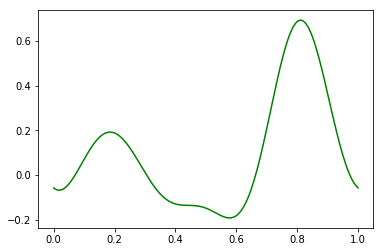

In [39]:
x_est_proj = np.linspace(start=0, stop=1, num=200, endpoint="True")
y_est_proj = np.linspace(start=0, stop=len(x_est_proj), num=len(x_est_proj))

k = 0
while k < len(x_est_proj):
    y_est_proj [k] = f_projete (x_est_proj [k], N [l_cv], X, Y)
    k += 1

plt.plot (x_est_proj, y_est_proj, color = "green")
plt.show ()

<P>
    La courbe obtenue est donc le meilleur estimateur de la fonction de régression $f$
</P>

<p>Enfin nous réitérons la procédure de validation croisée $200$ fois et nous traçons un histogramme des valeures optimales de N obtenues :

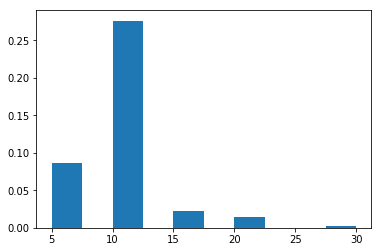

In [40]:
import matplotlib.patches as mpatches
from sklearn import datasets
 # 4
N_histo = []
for k in range (200) :
    ksi = np.random.normal(0,1,n)
    
    X = [uniform(0, 1) for i in range(n)]
    Y = [f (x) + (sigma * ksi) for x in X]
    
    for i in range(n) :
        Y [i] = f (X [i]) + (sigma * ksi [i])
    
    D = []

    for i in range (n) :
        D_inter = {"X" : X[i], "Y" : Y [i]}
        D.append (D_inter)

    D_melange = D

    np.random.shuffle(D_melange)

    B = []

    for v in range (V) :
        B_inter = D_melange [round (v * (n / V)) : round (((v + 1) * (n / V)))]
        B.append (B_inter)

    l_cv = np.argmin ([CV (V, D, B, l, N) for l in range (len (N))])
    #print(l_cv)
    N_histo.append (N [l_cv])

    
plt.hist (N_histo, normed = 1)
plt.show ()

<P>
    $\quad$Nous pouvons observer sur cet histogramme une prédominance de $N = 10$ comme valeure de $N$ optimale. Ensuite nous trouvons un nombre imortant de $N = 5$, mais très peu d'autres valeurs et aucunes supérieures à 30. Cela signifie que dans cet exemple il vaut mieux prendre un $N$ légèrement inférieur ou égal à 10.
</P>
<P>
    $\quad$ Grâce à ce premier exercice, nous avons découvert la méthode de la validation croisée, et son importance dans l'estimation d'une fonction de régression. Nous avons pu en déduire ses avantages : ainsi L'estimation de validation du taux d'erreur de test peut être très variable, en fonction précisément des observations incluses dans l'ensemble d'apprentissage et des observations incluses dans l'ensemble de validation. De plus, le taux d'erreur de l'ensemble de validation peut avoir tendance à surestimer le taux d'erreurs de test pour l'ajustement du modèle sur l'ensemble de données complet. De plus nous avons pensé que L'approche des ensembles de validation est conceptuellement simple et facile à mettre en œuvre.
</P>

<P>
    Nous pouvons donc appliquer cette méthode à un échantillon de données réelles :
</P>
<P>
__Exercice 2 : Données réelles__
</P>
<P>
  Nous avons choisi notre jeu de données sur le site de L'INSEE, nous avons importé un fichier csv de la démographie en France, il s'agit du nombre de naissances par année depuis 100 ans.<br>
    grâce à la méthode vue précédemment nous pourrons estimer la fonction de régression qui donne le nombre de naissances en fonction de l'année. 
    
</P>

In [50]:
##exercice 2 jeu de données:

import csv
file=open("insee.csv","r")
test=csv.reader(file, delimiter=";")

Naissances = []
Annee = []

N=[5,10,15,20,30,50,70]

for row in test:
    
    Naissances_inter = row [4]
    Annee_inter = row [0]
    
    if Naissances_inter != "Ensemble" :
        Naissances.append (float(Naissances_inter.replace(" ","")))
    if Annee_inter != "Annee" :
        #print (float (area_inter))
        Annee.append (float(Annee_inter)) 
        
# On normalise la longueur des petales
mini = min (Annee)
maxi = max (Annee)

for an in range (len (Annee)) :
    Annee [an] = (Annee [an] - mini) / (maxi-mini)
    
n=len(Naissances)
print(n)
print(len(Annee))
print (Annee)

100
100
[1.0, 0.98989898989899, 0.9797979797979798, 0.9696969696969697, 0.9595959595959596, 0.9494949494949495, 0.9393939393939394, 0.9292929292929293, 0.9191919191919192, 0.9090909090909091, 0.898989898989899, 0.8888888888888888, 0.8787878787878788, 0.8686868686868687, 0.8585858585858586, 0.8484848484848485, 0.8383838383838383, 0.8282828282828283, 0.8181818181818182, 0.8080808080808081, 0.797979797979798, 0.7878787878787878, 0.7777777777777778, 0.7676767676767676, 0.7575757575757576, 0.7474747474747475, 0.7373737373737373, 0.7272727272727273, 0.7171717171717171, 0.7070707070707071, 0.696969696969697, 0.6868686868686869, 0.6767676767676768, 0.6666666666666666, 0.6565656565656566, 0.6464646464646465, 0.6363636363636364, 0.6262626262626263, 0.6161616161616161, 0.6060606060606061, 0.5959595959595959, 0.5858585858585859, 0.5757575757575758, 0.5656565656565656, 0.5555555555555556, 0.5454545454545454, 0.5353535353535354, 0.5252525252525253, 0.5151515151515151, 0.5050505050505051, 0.494949494

<p> Pour que cette méthode puisse fonctionner nous avons normalisé les $X_i$ qui représentent les années. Nous avons affiché nos $X_i$ normalisés pour s'assurer de l'exactitude de la normalisation. Ensuite nous avons appliqué la méthode de validation croisée vue précédemment: 
    </p>

In [51]:
## Application de la validation croisée au jeu de données DEMOGRAPHIE:

D = []

for i in range (n) :
    D_inter = {"X" :Annee [i],"Y" : Naissances [i]}
    D.append (D_inter)

D_melange = D

np.random.shuffle(D_melange)

B = []

for v in range (V) :
    B_inter = D_melange [round (v * (n / V)) : round (((v + 1) * (n / V)))]
    B.append (B_inter)

l_cv = np.argmin ([CV (V, D, B, l, N) for l in range (len (N))])
print(l_cv)


1


<p>
    Nous obtenons un N optimale égale à $10$ car le programme nous retourne un $l_cv$ égale à 1 qui correspont à la deuxieme case du tableau des $N$. Enfin nous traçons l'estimateur de la fonction de régression correspondant à $$ l_{cv}=1$$
</P>

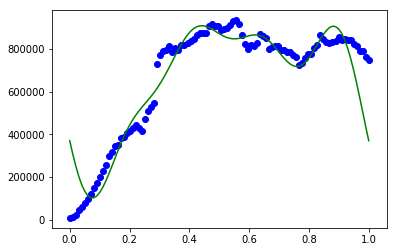

In [52]:
## tracer l'estimateur:

Annee_estim = np.linspace(start=0, stop=1, num=100, endpoint="True")

Naissances_estim= np.linspace(start=0, stop=len(Annee_estim), num=len(Annee_estim))

k = 0
while k < len(Annee_estim):
    Naissances_estim[k] = f_projete ( Annee_estim [k], N [l_cv], Annee, Naissances)
    k += 1

plt.scatter (Annee, Naissances, color = "blue")
plt.plot (Annee_estim, Naissances_estim, color = "green")
plt.show ()

<P>
    $\quad$ Nous remarquons que la courbe de l'estimateur de la fonction de régression en fonction de l'année (en vert) suit bien le nuage de points représentant le nombre de naissances par années
    <BR>
    $\quad$Nous pouvons observer que le nombre de naissance est très faible au début de ce siècle. Or cette période était marquée par les deux conflits mondiaux. Nous pouvons en conclure que la guerre totale n'est pas une période propice pour faire des enfants.
    <BR>
    $\quad$Puis nous observons une explosion démographique que nous pouvons associer à la période du "Baby Boom" des années 50, ce qui pourrai expliquer la quantité importante de jeunes dans les rues aux cours du mois de Mai 1968.
    <BR>
    $\quad$Enfin, nous pouvons constater une stagnation des naissances jusqu'à aujourd'hui ce qui induit un vieillissement de la population française et nous rend très inquiet pour nos futures retraites.
</P>